In [12]:
# Load data
import pandas as pd
df = pd.read_csv('data/HW3-Data-V3.csv')
df


,X,Y,class
0,1,15,0
1,2,10,1
2,2,11,1
3,2,15,1
4,3,12,0
...,...,...,...
199,112,14,0
200,112,77,1
201,113,78,1
202,114,75,1


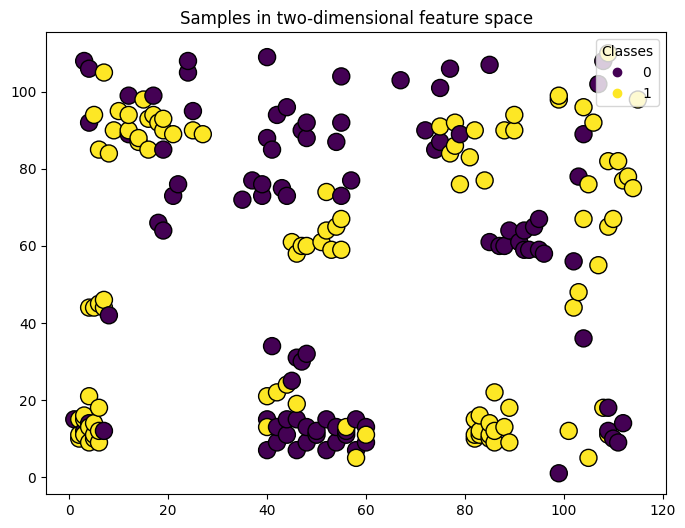

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# X = np.array(
#     [
#         [0.4, -0.7],
#         [-1.5, -1.0],
#         [-1.4, -0.9],
#         [-1.3, -1.2],
#         [-1.1, -0.2],
#         [-1.2, -0.4],
#         [-0.5, 1.2],
#         [-1.5, 2.1],
#         [1.0, 1.0],
#         [1.3, 0.8],
#         [1.2, 0.5],
#         [0.2, -2.0],
#         [0.5, -2.4],
#         [0.2, -2.3],
#         [0.0, -2.7],
#         [1.3, 2.1],
#     ]
# )

# y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

X = df[['X', 'Y']].to_numpy()
y = df['class'].to_numpy()

# Plotting settings
fig, ax = plt.subplots(figsize=(8, 6))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
plt.show()

In [21]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2, C=100).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

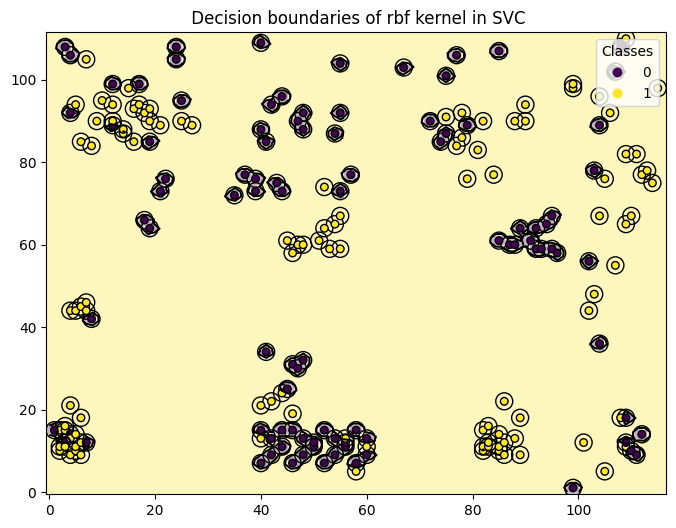

In [22]:
plot_training_data_with_decision_boundary("rbf")